# Weights are subjective and often need adjustment
There are tools in `pyemu` to assist with weight adjustment to balance the contribution of various groups.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pyemu
import os, shutil
import sys
sys.path.append('..')

### Copy down the base  files for the freyberg model with K and R parameters

In [2]:
import freyberg_setup
freyberg_setup.setup_pest_kr()
working_dir = freyberg_setup.WORKING_DIR_KR
pst_name = freyberg_setup.PST_NAME_KR


['botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'obs_loc.csv', 'potobs_group.csv', 'Process_output.py', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_kr
FloPy is using the following executable to run the model: /Users/jeremyw/Dev/gw1876/activities/freyberg_reweighting/freyberg_kr/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR

### We can read in the base PST file and do a quick run


In [3]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))

In [4]:
pst.control_data.noptmax

8

In [5]:
pst.control_data.noptmax=0
pst.write(os.path.join(working_dir,pst_name))

In [6]:
pyemu.helpers.run("pestpp {0}".format(pst_name),cwd=working_dir)


In [7]:
pst.phi

1322.402234703574

In [8]:
pst.phi_components

{'calflux': 0.0,
 'calhead': 1322.402234703574,
 'flx_constan': 0.0,
 'flx_in-out': 0.0,
 'flx_percent': 0.0,
 'flx_recharg': 0.0,
 'flx_river_l': 0.0,
 'flx_storage': 0.0,
 'flx_total': 0.0,
 'flx_wells': 0.0,
 'foreflux': 0.0,
 'forehead': 0.0,
 'foretrav': 0.0,
 'pothead': 0.0,
 'vol_constan': 0.0,
 'vol_in-out': 0.0,
 'vol_percent': 0.0,
 'vol_recharg': 0.0,
 'vol_river_l': 0.0,
 'vol_storage': 0.0,
 'vol_total': 0.0,
 'vol_wells': 0.0}

In [9]:
pst.phi_components_normalized

{'calflux': 0.0,
 'calhead': 1.0,
 'flx_constan': 0.0,
 'flx_in-out': 0.0,
 'flx_percent': 0.0,
 'flx_recharg': 0.0,
 'flx_river_l': 0.0,
 'flx_storage': 0.0,
 'flx_total': 0.0,
 'flx_wells': 0.0,
 'foreflux': 0.0,
 'forehead': 0.0,
 'foretrav': 0.0,
 'pothead': 0.0,
 'vol_constan': 0.0,
 'vol_in-out': 0.0,
 'vol_percent': 0.0,
 'vol_recharg': 0.0,
 'vol_river_l': 0.0,
 'vol_storage': 0.0,
 'vol_total': 0.0,
 'vol_wells': 0.0}

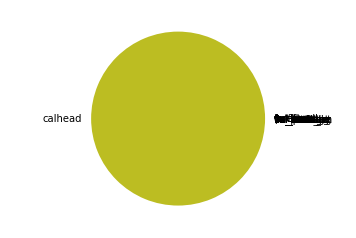

In [10]:
starting_components = pst.phi_components_normalized
plt.axis('equal')
plt.pie([float(v) for v in starting_components.values()], labels=[k for k in starting_components.keys()]);

In [11]:
pst.obs_groups

['flx_river_l',
 'flx_constan',
 'foreflux',
 'flx_percent',
 'vol_river_l',
 'flx_wells',
 'flx_recharg',
 'vol_constan',
 'calflux',
 'vol_recharg',
 'flx_storage',
 'vol_wells',
 'vol_total',
 'foretrav',
 'pothead',
 'flx_total',
 'vol_in-out',
 'flx_in-out',
 'calhead',
 'vol_storage',
 'vol_percent',
 'forehead']

In [12]:
groups = ['calflux','calhead']

In [13]:
new_portions = [0.4,0.6]

In [14]:
sum(new_portions)

1.0

In [15]:
newcomponents = dict(zip(groups,[i*pst.phi for i in new_portions]))

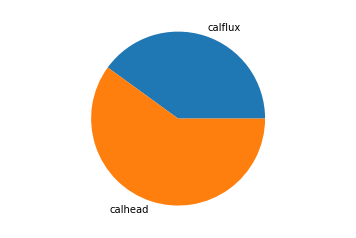

In [16]:
plt.axis('equal')
plt.pie([float(v) for v in newcomponents.values()], labels=[k for k in newcomponents.keys()]);

In [ ]:
newcomponents

In [ ]:
pst.observation_data.loc[pst.nnz_obs_names,:]

In [ ]:
pst.phi_components

In [ ]:
pst.adjust_weights_by_list(['calflux'],1.0)
pst.phi_components

In [ ]:
pst.adjust_weights(obsgrp_dict=newcomponents)
pst.phi_components

In [ ]:
pst.observation_data.loc[pst.nnz_obs_names,:]

In [ ]:
pst.phi

In [ ]:
pst.write(os.path.join(working_dir,pst_name.replace(".pst","_rewght.pst")))
pyemu.helpers.run("pestpp {0}".format(pst_name.replace(".pst","_rewght.pst")),cwd=working_dir)

## Relating weights to observation noise

Weights can initially be thought of as the reciprocal of observation noise, as characterized by standard deviation of the observation: 
$w=\frac{1}{\sigma}$

After adjustment, it's a good idea to calculate the equivalent $\sigma$ for each observation to determine whether it remains realistic. In this case:

In [ ]:
#initial weight for head
w=1
sig=1/w
sig

In [ ]:
#new weight for head
w=.774597
sig=1/w
sig

## This also applies after calibration, before uncertainty calculations...

According to the discrepancy prinicipal, the final objective function should equal the number of non-zero weighted observations....this is rarely the case.  This means we couldn't fit the data as well as we thought we could, which is usually a result of model error (not measurement error).  While this is an advanced topic, one really cheap way to cope with this problem is to scale the observation weights by the final residuals so that they reflect how well we actual could fit. 

In [ ]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name.replace(".pst","_rewght.pst")))
pst.phi

In [ ]:
pst.res.loc[pst.nnz_obs_names,:]

In [ ]:
len(pst.res.loc[pst.nnz_obs_names,:])

In [ ]:
pst.adjust_weights_resfile()
pst.phi

In [ ]:
pst.observation_data.loc[pst.nnz_obs_names,:]

See how much the weights were decreased?  This has implications for FOSM and Monte Carlo sampling...``pestpp`` does this rescaling automatically when it calculates FOSM uncertainty measures.  Its listed in the .rec file - check it out!